<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
tf.__version__

'2.8.2'

In [83]:
fashion_train = pd.read_csv('/content/drive/MyDrive/Datasets/fashion-mnist-train.csv')
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
fashion_test = pd.read_csv('/content/drive/MyDrive/Datasets/fashion-mnist-test.csv')
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
training = np.array(fashion_train, dtype='float32')
testing = np.array(fashion_test, dtype='float32')

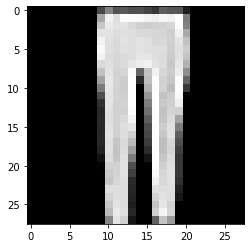

In [86]:
# visualizing image
plt.imshow(training[random.randint(1, training.shape[0]), 1:].reshape((28,28)),cmap='gray');

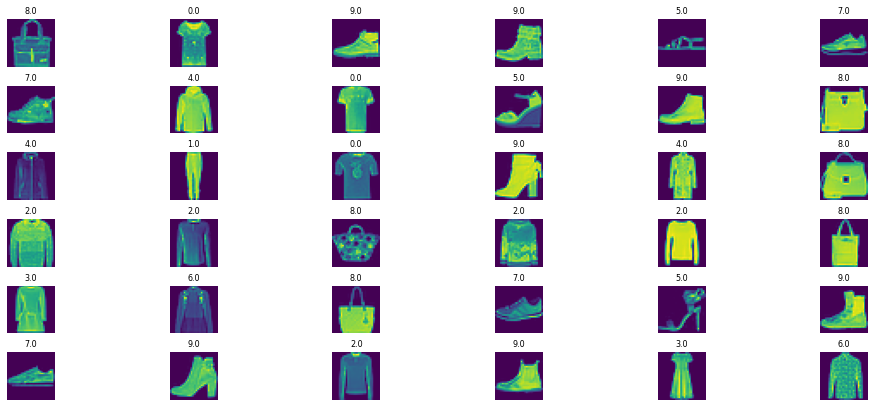

In [87]:
L_grid = 6
W_grid = 6
f, ax = plt.subplots(L_grid, W_grid, figsize=(17,7))
ax = ax.ravel()
n_train = len(training)
for i in np.arange(0, W_grid * L_grid):
    idx = np.random.randint(0, n_train)
    ax[i].imshow(training[idx,1:].reshape((28,28)))
    ax[i].set_title(training[idx,0], fontsize=8)
    ax[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [88]:
X_train, y_train = training[:,1:] / 255, training[:,0]
X_test, y_test = testing[:,1:] / 255, testing[:,0]

In [89]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [90]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [91]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(3,3))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPool2D(3,3))

# cnn.add(layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [92]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs_house = cnn.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
960/960 [==============================] - 4s 4ms/step - loss: 0.6550 - accuracy: 0.7648 - val_loss: 0.4855 - val_accuracy: 0.8208
Epoch 2/100
960/960 [==============================] - 3s 4ms/step - loss: 0.4125 - accuracy: 0.8497 - val_loss: 0.3683 - val_accuracy: 0.8742
Epoch 3/100
960/960 [==============================] - 3s 3ms/step - loss: 0.3558 - accuracy: 0.8720 - val_loss: 0.3384 - val_accuracy: 0.8827
Epoch 4/100
960/960 [==============================] - 4s 4ms/step - loss: 0.3258 - accuracy: 0.8823 - val_loss: 0.3406 - val_accuracy: 0.8815
Epoch 5/100
960/960 [==============================] - 3s 3ms/step - loss: 0.3059 - accuracy: 0.8887 - val_loss: 0.3238 - val_accuracy: 0.8838
Epoch 6/100
960/960 [==============================] - 3s 4ms/step - loss: 0.2874 - accuracy: 0.8949 - val_loss: 0.3104 - val_accuracy: 0.8902
Epoch 7/100
960/960 [==============================] - 3s 3ms/step - loss: 0.2760 - accuracy: 0.8999 - val_loss: 0.2899 - val_accuracy: 0.8958

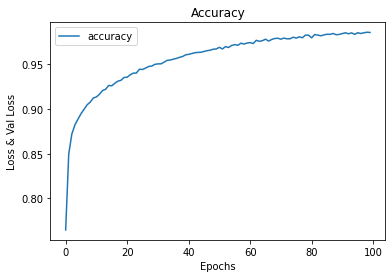

In [93]:
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Val Loss')
sns.lineplot(data=epochs_house.history['accuracy'])
plt.legend(['accuracy']);

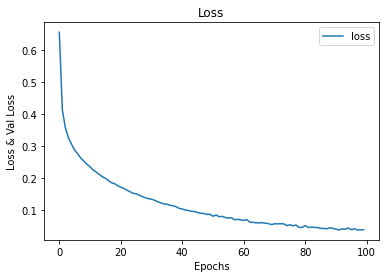

In [94]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss & Val Loss')
sns.lineplot(data=epochs_house.history['loss'])
plt.legend(['loss']);

In [95]:
eval = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7654 - accuracy: 0.8990


In [96]:
eval

[0.7653652429580688, 0.8989999890327454]

In [97]:
pred = cnn.predict(X_test)

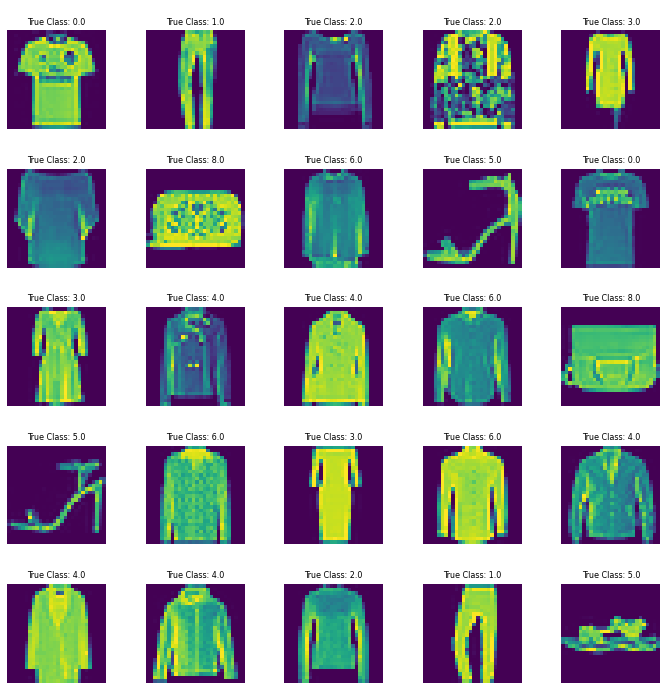

In [98]:
L_grid = 5
W_grid = 5
f, ax = plt.subplots(L_grid, W_grid, figsize=(12,12))
ax = ax.ravel()

for i in np.arange(0, W_grid * L_grid):
    ax[i].imshow(X_test[i].reshape((28,28)))
    ax[i].set_title(f"\nTrue Class: {y_test[i]}", fontsize=8)
    ax[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# LeNet Architecture

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.8.2'

In [100]:
zip = zipfile.ZipFile('/content/drive/MyDrive/Datasets/traffic-signs-data.zip')
zip.extractall()

In [101]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [102]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [103]:
X_train.shape

(34799, 32, 32, 3)

In [104]:
y_train.shape

(34799,)

In [105]:
X_test.shape

(12630, 32, 32, 3)

In [106]:
X_validation.shape

(4410, 32, 32, 3)

26

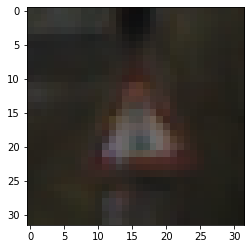

In [107]:
plt.imshow(X_train[1500])
y_train[1500]

8

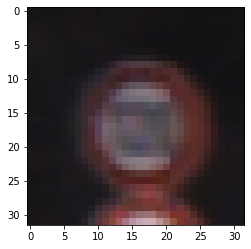

In [108]:
plt.imshow(X_test[1501])
y_test[1501]

In [109]:
X_train, y_train = shuffle(X_train, y_train)

# converting to gray scale
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis=3, keepdims=True)

In [110]:
# verifying channels
X_train_gray.shape[3] ,X_test_gray.shape[3], X_validation_gray.shape[3]

(1, 1, 1)

In [111]:
# normalization
X_train_gray_norm = (X_train - 128) / 128
X_test_gray_norm = (X_test - 128) / 128
X_validation_gray_norm = (X_validation - 128) / 128

<Figure size 432x288 with 0 Axes>

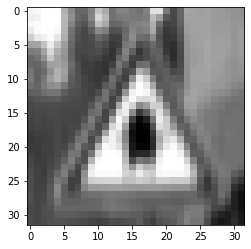

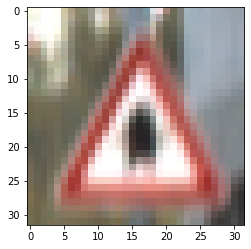

<Figure size 432x288 with 0 Axes>

In [112]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [113]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [114]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [115]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 120)              

In [116]:
LeNet.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [117]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 11ms/step - loss: 3.4318 - accuracy: 0.1211 - val_loss: 3.4146 - val_accuracy: 0.1356
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 2.8471 - accuracy: 0.2727 - val_loss: 2.7340 - val_accuracy: 0.3088
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 2.0696 - accuracy: 0.4652 - val_loss: 1.9785 - val_accuracy: 0.4964
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 1.4879 - accuracy: 0.6100 - val_loss: 1.5519 - val_accuracy: 0.5907
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 1.1634 - accuracy: 0.6861 - val_loss: 1.3132 - val_accuracy: 0.6476
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.9629 - accuracy: 0.7432 - val_loss: 1.1229 - val_accuracy: 0.6821
Epoch 7/50
70/70 [==============================] - 0s 7ms/step - loss: 0.8166 - accuracy: 0.7854 - val_loss: 0.9875 - val_accuracy: 0.7231
Epoch 8/50
70/70 [=

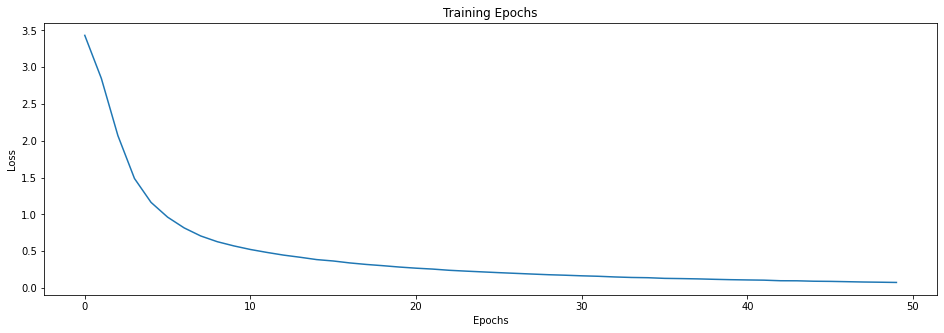

In [118]:
plt.figure(figsize=(16,5))
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=history.history['loss']);

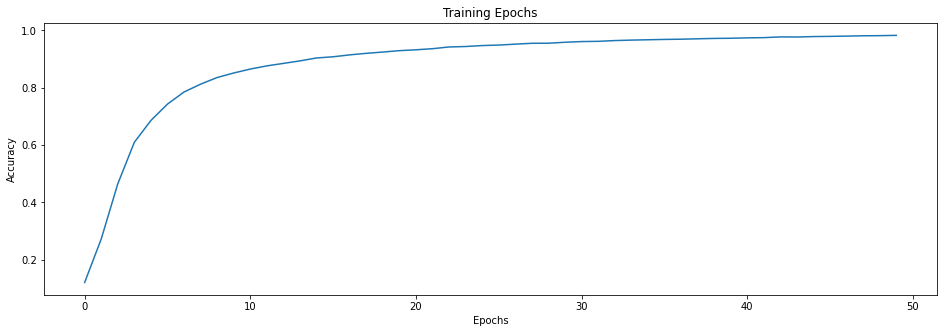

In [119]:
plt.figure(figsize=(16,5))
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
sns.lineplot(data=history.history['accuracy']);

In [120]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.8314 - accuracy: 0.8679
Test Accuracy: 0.8678542971611023


In [121]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [122]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [123]:
val_accuracy

[0.13560090959072113,
 0.3088435232639313,
 0.49637189507484436,
 0.5907029509544373,
 0.6476190686225891,
 0.682086169719696,
 0.7231292724609375,
 0.7444444298744202,
 0.7503401637077332,
 0.7784580588340759,
 0.7927437424659729,
 0.7925170063972473,
 0.8102040886878967,
 0.8170068264007568,
 0.8090702891349792,
 0.8292517066001892,
 0.8272109031677246,
 0.8224489688873291,
 0.8204081654548645,
 0.8383219838142395,
 0.8471655249595642,
 0.8462585210800171,
 0.8501133918762207,
 0.8476190567016602,
 0.855555534362793,
 0.8598639369010925,
 0.8546485304832458,
 0.8616780042648315,
 0.8637188076972961,
 0.858730137348175,
 0.8603174686431885,
 0.8564625978469849,
 0.8510203957557678,
 0.8705215454101562,
 0.8684807419776917,
 0.8689342141151428,
 0.8702948093414307,
 0.8598639369010925,
 0.8748299479484558,
 0.8716553449630737,
 0.8698412775993347,
 0.8795918226242065,
 0.8727891445159912,
 0.8698412775993347,
 0.8786848187446594,
 0.8802720904350281,
 0.8795918226242065,
 0.87346941232

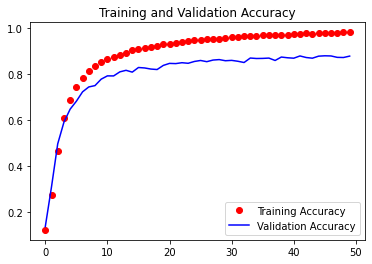

In [124]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

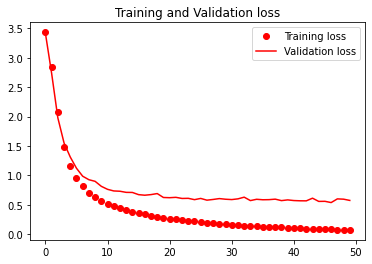

In [125]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [126]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

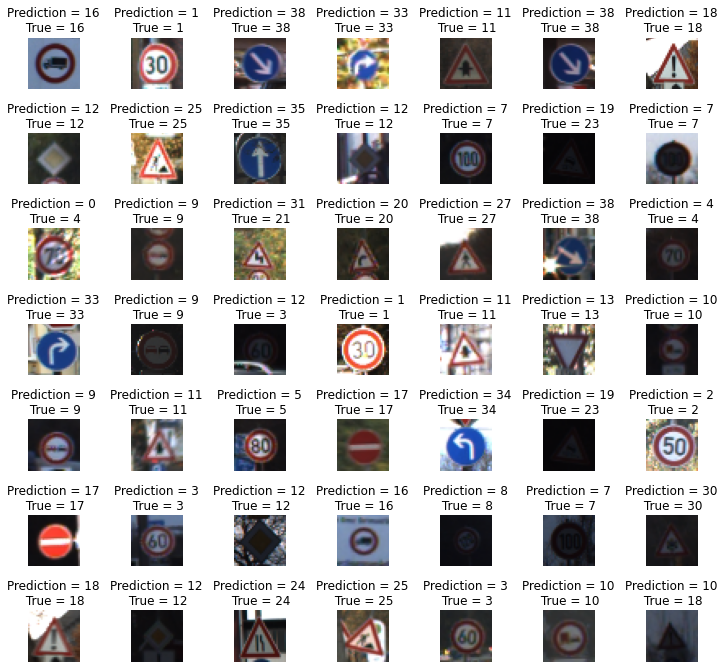

In [127]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    